# File Directory

In [ ]:
|-- students_performance_visualization/
|   |-- data/
│       |-- StudentsPerformance.csv
│       |-- README.txt
|   │-- src/
│       |-- CS5530_HW1_Q2.ipynb
|   │-- results/
│       |-- math_scores_by_lunch_type.png
│       |-- avg_scores_by_parental_education.png
│       |-- math_reading_scores_by_gender.png
│       |-- lunch_distribution_by_race.png
│       |-- reading_score_by_gender.png
|       |-- visualizations_analysis.txt

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Mount Google Drive and Import File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.shape

(1000, 8)

# Inspect Data
check for null values,
duplicates,
data types,
and unexpected values


In [ ]:
print(data.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
print(data.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
for column in data.columns:
    print(f"{column}: {data[column].unique()}")

gender: ['female' 'male']
race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']
math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing score: [ 74  88  93  44  75 

# Data Visualizations

1. The boxplot of math scores by lunch type shows how students with a standard lunch type tend to have a higher median math score compared to those with a free/reduced lunch type. We can see there is an outlier whose math score is significantly higher than the rest of the students with a free/reduced lunch type. In both lunch types, there exists outliers with significantly lower math scores.

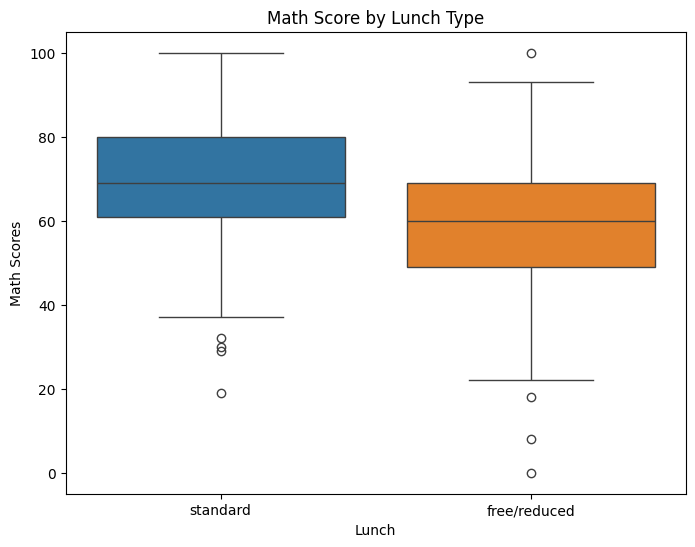

In [ ]:
# 1. Boxplot of Math Scores by Lunch Type
plt.figure(figsize=(8, 6))
sns.boxplot(data, x="lunch", y="math score", hue="lunch")
plt.title('Math Score by Lunch Type')
plt.xlabel("Lunch")
plt.ylabel("Math Scores")
plt.savefig("math_scores_by_lunch_type.png", dpi=300, bbox_inches='tight')
plt.show()


2. The bar chart allows for visualizing average math, reading, and writing scores among students and their parents level of education. From the chart we can see students whose parents have a lower education level (high school, some high school, some college) tend to have slightly lower scores across the board compared with those whose parents have higher education levels (associate's, bachelor's, or master's degrees).

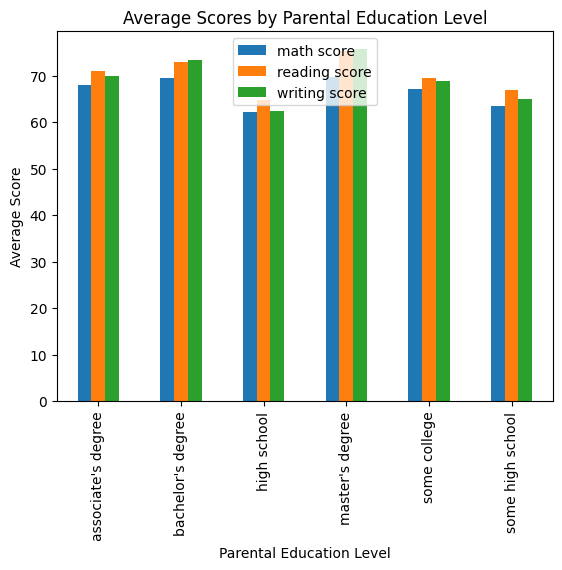

In [ ]:
# 2. Bar Chart of Average Math, Reading, and Writing Scores by Level of Parental Education
ax = data.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().plot(kind="bar")
plt.title("Average Scores by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Average Score")
plt.savefig("avg_scores_by_parental_education.png", dpi=300, bbox_inches='tight')
plt.show()

3. With the scatter plot we can see that there is a positive correlation between math and reading scores. As math scores increase, reading scores tend to increase. There are gender differences that can be seen as well. Females tend to have higher reading scores compared to males with similar math scores. We can see some outliers exist that have lower scores in either math or reading.

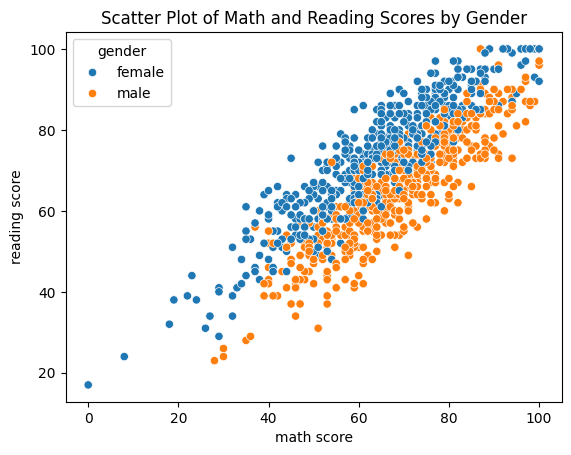

In [ ]:
# 3. Scatter Plot of Math and Reading Scores by Gender
sns.scatterplot(data=data, x='math score', y='reading score', hue='gender')
plt.title('Scatter Plot of Math and Reading Scores by Gender')
plt.savefig("math_reading_scores_by_gender.png", dpi=300, bbox_inches='tight')
plt.show()

4. In the stacked bar chart we can see the frequency of lunch types among the different race/ethnicity groups. Groups C and D have the largest student counts and as well as the larger absolute count of students who receive free/reduced lunch as well as students who receive the standard lunch. Group A has the fewest students as well as the fewest students receiving free/reduced lunch. From this chart we can also see the majority of students are receiving the standard lunch among all groups.

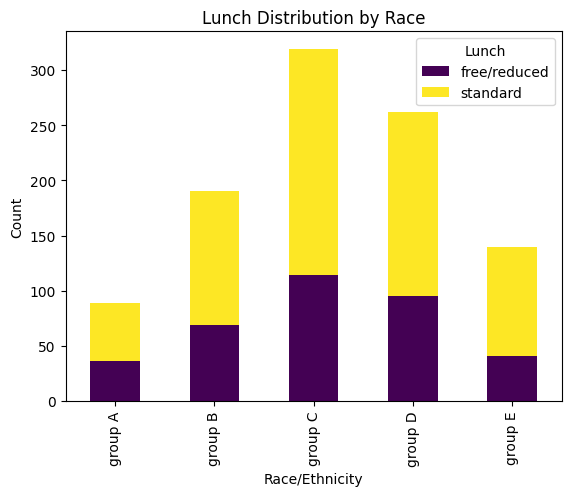

In [ ]:
# 4. Stacked Bar Chart Distribution of Lunch Type by Race
race_lunch_counts = data.groupby(["race/ethnicity", "lunch"]).size().unstack()
race_lunch_counts.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Lunch Distribution by Race")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.legend(title="Lunch")
plt.savefig("lunch_distribution_by_race.png", dpi=300, bbox_inches='tight')
plt.show()

5. In this violin plot we can visualize the gender differences in male and female students reading scores. We can see that females tend to have an overall higher median score compared to their counterparts. Female students have a wider range of scores, with their lowest scores being lower than those of male students.

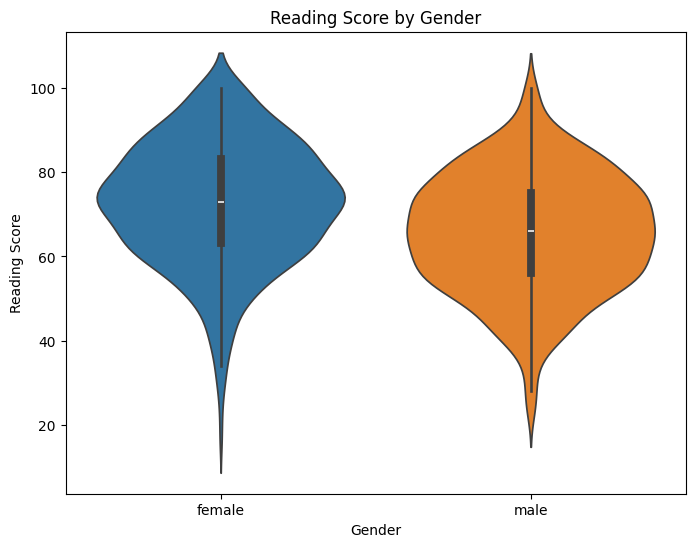

In [ ]:
# 5. Violinplot of Reading Score by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(data, x="gender", y="reading score", hue="gender")
plt.title('Reading Score by Gender')
plt.xlabel("Gender")
plt.ylabel("Reading Score")
plt.savefig("reading_score_by_gender.png", dpi=300, bbox_inches='tight')
plt.show()